In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [138]:
from sklearn.datasets import load_breast_cancer

In [139]:
cancer_dataset = load_breast_cancer()
print(cancer_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [140]:
print(cancer_dataset.target_names)

['malignant' 'benign']


In [141]:
X = pd.DataFrame(cancer_dataset.data,columns=cancer_dataset.feature_names)
y = pd.DataFrame(cancer_dataset.target,columns=["verdict"])

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12)

In [143]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [144]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [145]:
from sklearn.metrics import r2_score

y_pred = regression.predict(X_test)
score = r2_score(y_true=y_test,y_pred=y_pred)

print("The score is ", score)

The score is  0.696366335665708


In [146]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
x_test = pca.transform(X_test)

In [147]:
captured_info = [var*100 for var in pca.explained_variance_ratio_]
print(captured_info)

[44.32678812644643, 18.79865168581589, 9.591069601351409, 6.550643148222727, 5.56536411689557, 4.113321422588568, 2.191253861606705, 1.5630268932550175, 1.3871595684590698, 1.1734102711061012, 0.9963696789954483, 0.9065225299957945, 0.7363318012333582, 0.4704544748625998, 0.2941874677916281, 0.26647217880106566, 0.19854542847632223, 0.18837902157839365, 0.1449449463841964, 0.10747102189553542, 0.09611380677779485, 0.0875761215212019, 0.0709194574693463, 0.06280140162999262, 0.053281097888703124, 0.027843564709052592, 0.023217576512775912, 0.0054293546586260035, 0.0020645111539373782, 0.00038586191675532143]


In [148]:
pca_names = [f"PCA-{i}" for i in range(0,len(captured_info))]
print(pca_names)

['PCA-0', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5', 'PCA-6', 'PCA-7', 'PCA-8', 'PCA-9', 'PCA-10', 'PCA-11', 'PCA-12', 'PCA-13', 'PCA-14', 'PCA-15', 'PCA-16', 'PCA-17', 'PCA-18', 'PCA-19', 'PCA-20', 'PCA-21', 'PCA-22', 'PCA-23', 'PCA-24', 'PCA-25', 'PCA-26', 'PCA-27', 'PCA-28', 'PCA-29']


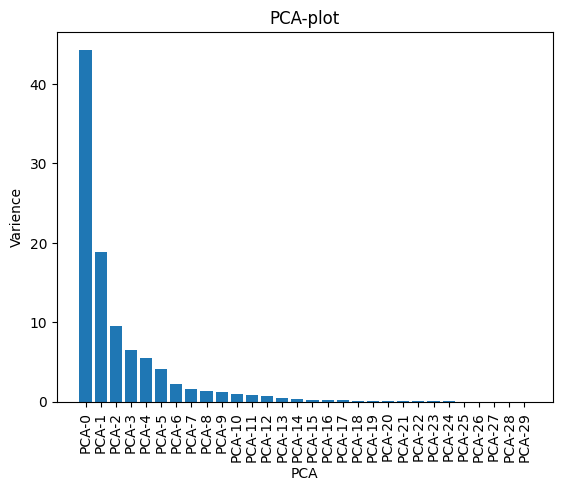

In [149]:
plt.bar(pca_names, captured_info)
plt.title('PCA-plot')
plt.xlabel('PCA')
plt.ylabel('Varience')

plt.xticks(rotation=90)

plt.show()

In [150]:
sum = 0
for i in range(15):
    sum+=captured_info[i]

print(sum)

98.66455464862635


### Training now with pca

In [151]:
X = pd.DataFrame(cancer_dataset.data,columns=cancer_dataset.feature_names)
y = pd.DataFrame(cancer_dataset.target,columns=["verdict"])

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12)

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("scale",StandardScaler()),
    ("pca",PCA()),
    ("regression",LinearRegression(n_jobs=-1))
])

param_grid={
    "pca__n_components":[i for i in range(1,31)]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

print("Best PCA components:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best PCA components: {'pca__n_components': 27}
Best CV score: 0.7495706176251398
